In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
file = "../data/raw/ENB2012_data.csv"
# file_regress = "../data/processed/regression.csv"
file_classification = "../data/processed/classification.csv"
df =  pd.read_csv(file)
# df_regress =  pd.read_csv(file_regress)
df_class = pd.read_csv(file_classification)

In [8]:
from sklearn.feature_selection import f_regression, mutual_info_regression

X = df_class.iloc[:,:-2] 
y = df_class.iloc[:,-2] 
mi = mutual_info_regression(X,y)
indices = np.argsort(mi)[::-1][:12]
print(mi[indices])
mi_features = list(df_class.columns[indices])
print("""The top ten most important fetures by mutual information selection:
""", mi_features)

[0.62801612 0.62227062 0.58484467 0.57531989 0.56401251 0.26171703
 0.02216777 0.0168025  0.00910781 0.00774071 0.00737781 0.00608052]
The top ten most important fetures by mutual information selection:
 ['X4', 'Unnamed: 0', 'X1', 'X5', 'X2', 'X3', 'x1_4.0', 'x1_0.0', 'x0_4.0', 'x0_3.0', 'x1_1.0', 'X7']


In [9]:
f_test, _ = f_regression(X, y)
indices_f = np.argsort(f_test)[::-1][:12]
f_test_features = list(df_class.columns[indices_f])
print("""The top ten most important fetures by f test:
""", f_test_features)

The top ten most important fetures by f test:
 ['X5', 'X4', 'X2', 'X1', 'X3', 'x1_0.0', 'X7', 'x1_2.0', 'x1_1.0', 'x1_3.0', 'x1_4.0', 'x1_5.0']


#### The balance of the dataset

In [10]:
df_class['Y1'].value_counts()/df['Y1'].shape[0]

0    0.520833
1    0.479167
Name: Y1, dtype: float64

In [11]:
df_class['Y2'].value_counts()/df['Y2'].shape[0]

0    0.511719
1    0.488281
Name: Y2, dtype: float64

### Plot class-specific distributions of numerical features

In [32]:
from collections import OrderedDict
num_ftrs = ['X1','X2','X3','X4','X5','X7']
cat_ftrs = ['X6','X8']
target_ftrs = ['Y1', 'Y2']
dict_ftrs_names = {
    'X1' : 'Relative compactnesss', 
    'X2' : 'Surface area [m$^2$]', 
    'X3' : 'Wall area [m$^2$]', 
    'X4' : 'Roof area [m$^2$]', 
    'X5' : 'Overall height [m]', 
    'X6' : 'Orientation', 
    'X7' : 'Glazing area (fraction of floor area)', 
    'X8' : 'Glazing area distribution',
    'Y1' : r'Heat loading [$\rm{kWh/m^2}$]',     
    'Y2' : r'Cool loading [$\rm{kWh/m^2}$]',     
}

ftrs_names = {
    'X1' : 'Compactnesss', 
    'X2' : 'Surface area', 
    'X3' : 'Wall area', 
    'X4' : 'Roof area', 
    'X5' : 'Overall height', 
    'X6' : 'Orientation', 
    'X7' : 'Glazing area', 
    'X8' : 'Glazing area distribution',
    'Y1' : 'Heat loading',     
    'Y2' : 'Cool loading',     
}

X6_dict = OrderedDict({2:'North', 3:'East', 4:'South', 5:'West'})

X8_dict = OrderedDict({0:'Unknown', 1:'Uniform', 2:'North', 
                       3:'East', 4:'South', 5:'West'})
df.X7.unique()

array([0.  , 0.1 , 0.25, 0.4 ])

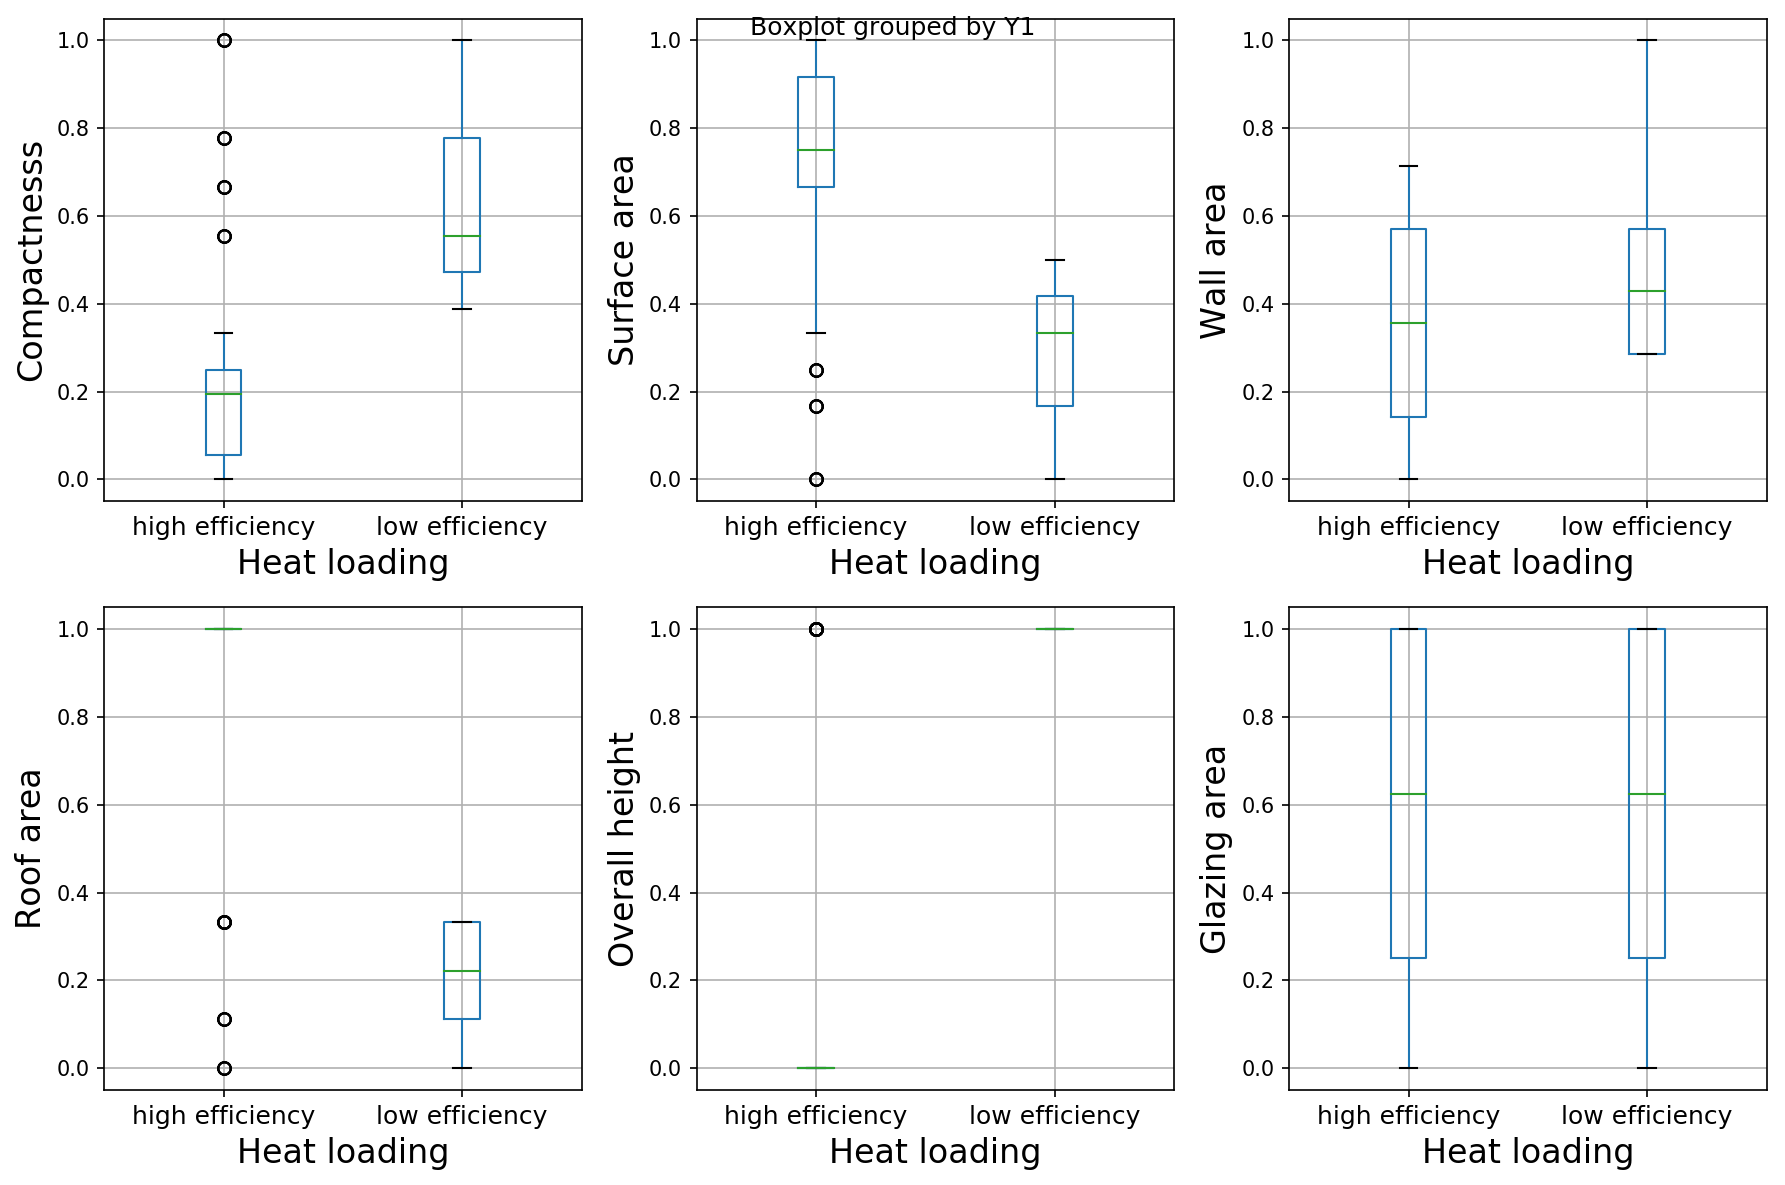

In [33]:
# 6 continuous features: boxplots
plt.figure(figsize=(12,8),dpi=150)
label = 'Y1'
wspace = 0.2   
hspace = 0.2
plt.subplots_adjust(wspace, hspace);
np.random.seed(1234)
for i, feature in enumerate(num_ftrs):
    ax = plt.subplot(2,3,i+1)
#     df.plot.scatter(feature, label, ax=ax, 
#                     color=np.random.rand(3,))
    df_class[[label, feature]].boxplot(by=label, ax=ax)
    ax.set_ylabel(ftrs_names[feature], fontsize=16) 
    ax.set_xlabel(ftrs_names[label], fontsize=16)
    ax.set_xticklabels(['high efficiency', 'low efficiency'], 
                       fontsize=12)    
    ax.set_title("")
plt.tight_layout()
plt.savefig("../figures/num_ftrs_classification.png")

### Plot class-specific distributions of categorical features

In [25]:
def plot_stackbar(df, feature, target, ax):
    count_matrix = df.groupby([feature, target]).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
    count_matrix_norm.plot(kind='bar', stacked=True, ax=ax)
    ax.legend(["high efficiency", "low efficiency"],loc=4, fontsize=16)
    ax.set_xticklabels(['No', 'Yes'], fontsize=16)

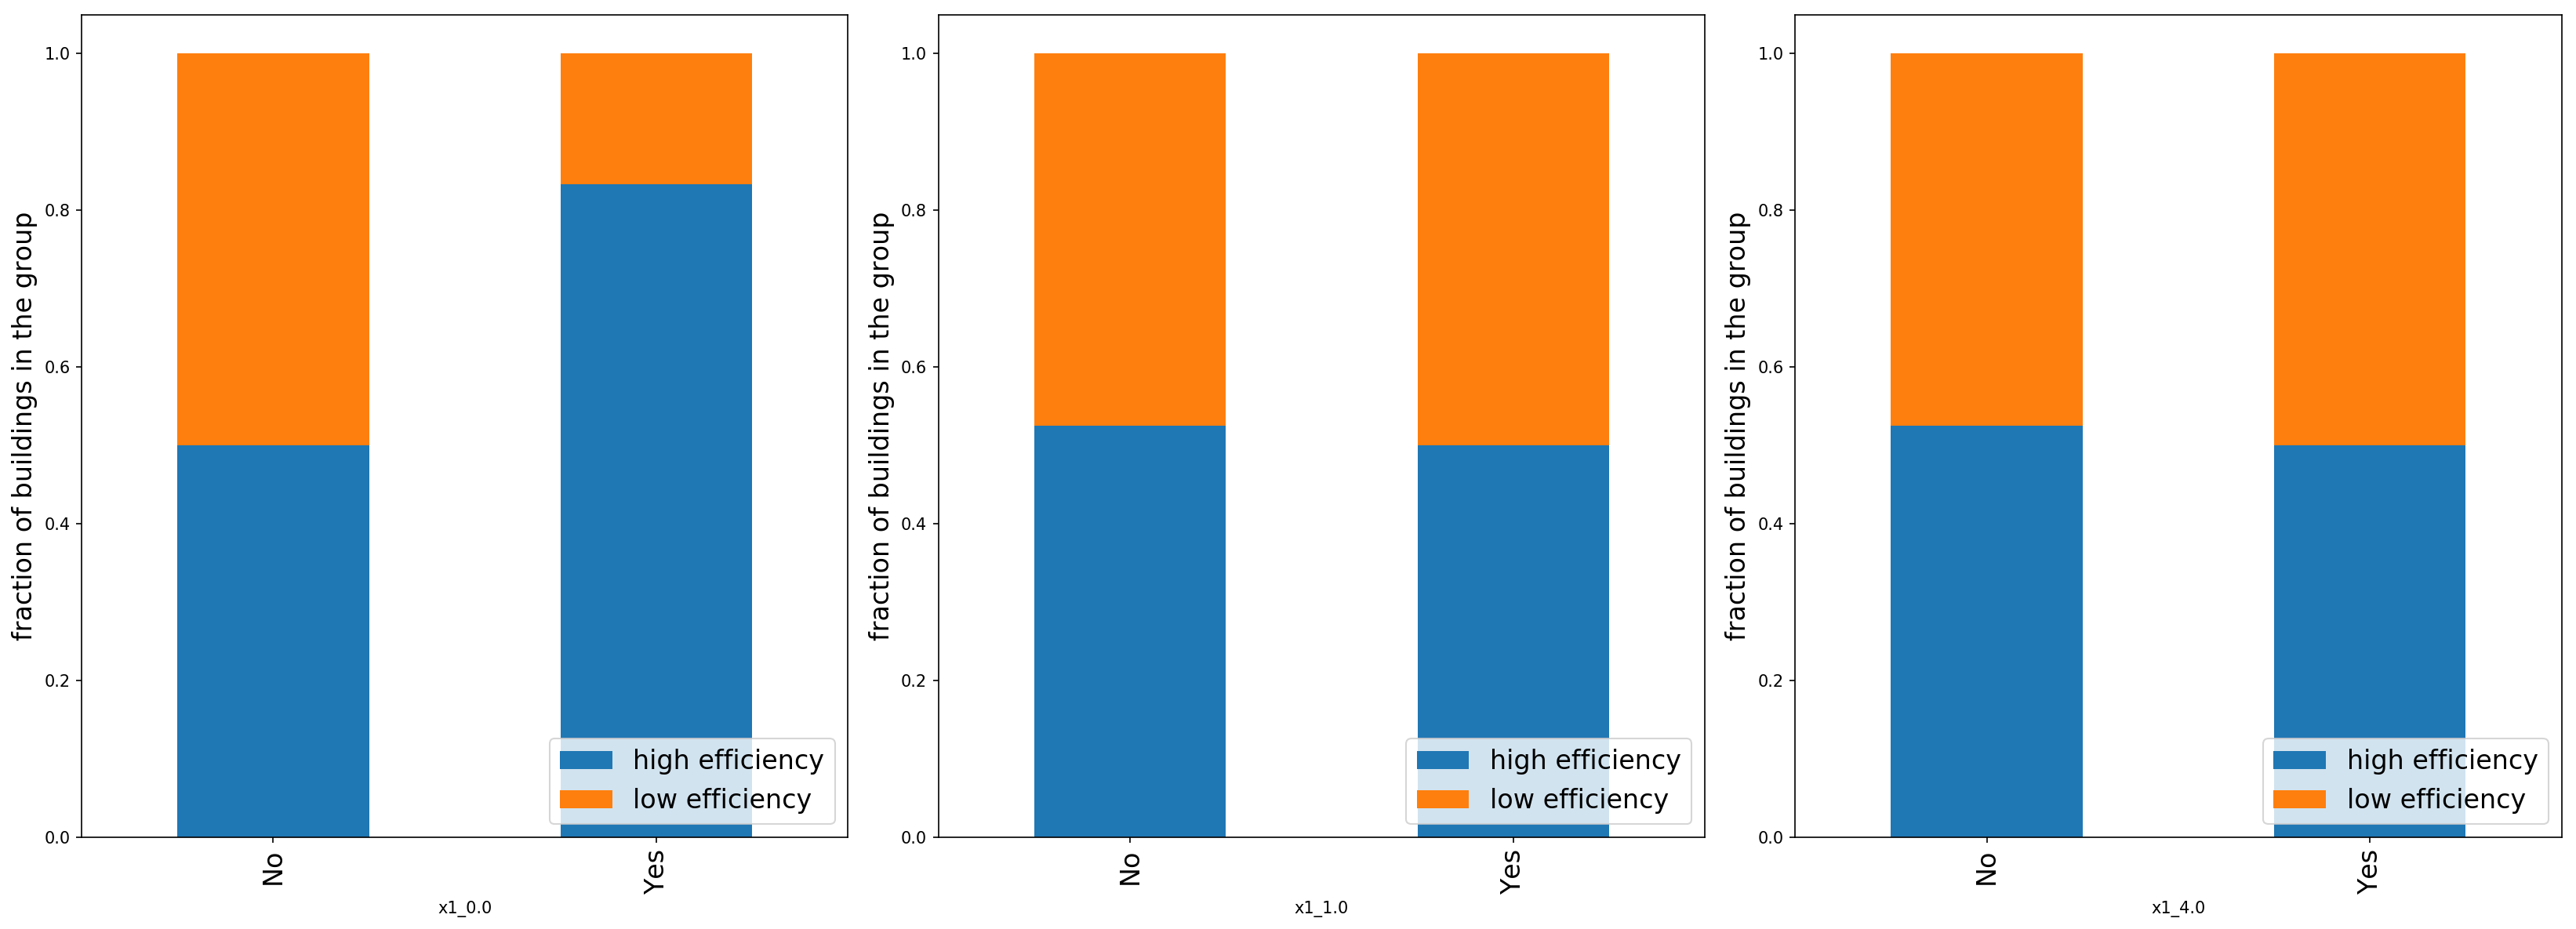

In [31]:
# 3 categorical features
plt.figure(figsize=(22,8),dpi=150)
label = 'Y1'
wspace = 0.2   
hspace = 0.2
plt.subplots_adjust(wspace, hspace);
cat_rankedftrs = ['x1_0.0' ,'x1_1.0', 'x1_4.0']
for i, feature in enumerate(cat_rankedftrs):
    ax = plt.subplot(1,3,i+1)
    plot_stackbar(df_class, feature, label, ax)
#     ax.set_xlabel(dict_ftrs_names[feature], fontsize=16) 
    ax.set_ylabel("fraction of buildings in the group", fontsize=16)
    ax.set_title("")
plt.tight_layout()
plt.savefig("../figures/cat_ftrs_classification.png")